<a href="https://colab.research.google.com/github/AlexandraLutaya/Non-alcoholic-fatty-liver-disease/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_%D0%BD%D0%B5%D0%B0%D0%BB%D0%B3%D0%BE%D0%BA%D0%BE%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%B6%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D1%8F_%D0%B1%D0%BE%D0%BB%D0%B5%D0%B7%D0%BD%D1%8C_%D0%BF%D0%B5%D1%87%D0%B5%D0%BD%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Неалкогольная жировая болезнь печени

Нам поступил табличный набор данных, содержащий информацию о пациентах и факторах, связанных с развитием этого заболевания.

Необходимо провести анализ предоставленных датасетов, визуализировать основные зависимости и закономерности, выполнить очистку и сделать выводы на основе проведённого исследования.

##Загрузка библиотек и написание собственных функций

In [1]:
pip install phik

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 6.0 MB/s eta 0:00:00


In [2]:
pip install --upgrade gdown

In [3]:
#загрузим необходимые библиотеки
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from phik import phik_matrix

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore', module='pandas')
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
#функция для изучения данных на аномальные значения и попуски
#функция принимает на вход DataFrame, выводит текстовые сообщения на консоль
def anomaly(data):
  #выводим размер датасета
  print(f'Размер файла:{data.shape}')
  print('-'*100)
  #для вывода всех столбцов создаем цикл
  #выделяем в отдельную переменную названия столбцов
  column_data= data.columns
  #циклом перебираем все значения и выводим данные
  for c in column_data:
    #выводим все уникальные значения
    print(f'Уникальные значения показателя: {c}')
    print(data[c].unique())
    #считаем количество уникальных значений
    print(f'Количество уникальных значений: {data[c].nunique()}')
    #считаем количество всех значений
    print(f'Количество всех значений: {data[c].count()}')
    #считаем количество пропусков
    print(f'Количество пропусков в столбце {c}: {data[c].isna().sum()}')
    print('-'*100)

In [5]:
#функция для оценки пропусков в данных
#функция принимает на вход DataFrame, выводит текстовые сообщения на консоль
def nan_counts(df):
  #считаем количество пропусков в строке
  nan_counts = df.isna().sum(axis=1)
  #проверяем, какие строки имеют более половины NaN
  half_nan_rows = nan_counts > len(df.columns) / 2
  #количество строк с более чем половиной NaN
  num_half_nan_rows = half_nan_rows.sum()
  #вывод результатов
  print(f"\nОбщее количество строк с более чем половиной NaN: {num_half_nan_rows}")

In [6]:
#функция для исследовательского анализа количественных данных
#функция принимает на вход DataFrame (количественные данне), выводит графики на консоль
def analisys_num(data):
    fig, axes = plt.subplots(1, 3, figsize=(10, 5))

    #настраиваем построение гистограммы
    axes[0].hist(data.dropna(), bins=20)
    axes[0].set_title('Гистограмма показателя')
    axes[0].set_xlabel('Значения показателя')
    #визуально выводим среднее значение и медиану
    axes[0].axvline(data.median(), color='b', linestyle='dashed', linewidth=2)
    axes[0].axvline(data.mean(), color='r', linestyle='-', linewidth=2)
    axes[0].legend(['Медиана', 'Среднее'], prop={'size': 6})

    #постройка боксплота для данных
    axes[1].set_title('Боксплот показателя')
    axes[1].boxplot(data.dropna())
    #настройка скрипичной диаграммы
    axes[2].set_title('Скрипичная диаграмма показателя')
    axes[2].violinplot([data.dropna()], vert=False, widths=0.75,
                       showmeans=True, showmedians=True)
    plt.tight_layout()
    plt.show()
    #выводим статистику по показателю
    print('Показатели описательной статистики')
    print(data.describe())

In [7]:
#функция для исследовательского анализа качественных данных с использованием круговой диаграммы
#функция принимает данные и считает их количество внутри каждого уникального значения,
#после выводит круговой график
#функция принимает на вход DataFrame, выводит графики на консоль
def analisys_cat_pie(data, labels=None):
    if labels is not None:
      data = data.map(labels)

    data.value_counts().plot(kind='pie', autopct='%.2f%%', figsize=(5, 5))
    plt.title('Круговая диаграмма показателя', size=10)
    plt.show()

In [8]:
#функция для исследовательского анализа качевтенных данных с использованием столбчатой диаграммы
#функция принимает данные и считает их количество внутри каждого уникального значения,
#после выводит столбчатую диаграмму
#функция принимает на вход DataFrame, выводит графики на консоль
def analisys_cat_plot(data):
    data.value_counts(ascending=True).plot(kind='bar', alpha=0.8)
    plt.title('Столбчатая диаграмма', size=15)
    plt.xlabel('Количество', size=12)
    plt.ylabel('Значения', size=12)
    plt.show()

In [9]:
#функция для вывода графика Lmplot
#функция принимает датасет и названия столбцов, по которым надо построить график
#функция принимает на вход DataFrame, выводит графики сообщения на консоль
def grafic(data, x, y):
    sns.lmplot(x=x, y=y, data=data)
    plt.title(f'Зависимость показателя {y} от показателя {x}', size=10)
    plt.xlabel(f'Показатель {x}', size=8)
    plt.ylabel(f'Показатель {y}', size=8)
    plt.show()

In [10]:
#напишем функцию, чтобы перезаполнить возраст с учетом категорий
# 1 категория 18-24, 13 более 80, шаг 5 лет
#функция принимает на вход DataFrame, выводит модифицированных DataFrame
def age(data):
  data['age_category']=0
  #с помощью цикла перебираем значение в каждой строке в столбце 'age'
  for index, row in data.iterrows():
    #с помощью условной конструкции относим возраст к определенной категории и перезаписываем значение
    if 18 <= row['age'] <= 24:
      data.at[index, 'age_category'] = 1
    elif 25 <= row['age'] <= 29:
      data.at[index, 'age_category'] = 2
    elif 30 <= row['age'] <= 34:
      data.at[index, 'age_category'] = 3
    elif 35 <= row['age'] <= 39:
      data.at[index, 'age_category'] = 4
    elif 40 <= row['age'] <= 44:
      data.at[index, 'age_category'] = 5
    elif 45 <= row['age'] <= 49:
      data.at[index, 'age_category'] = 6
    elif 50 <= row['age'] <= 54:
      data.at[index, 'age_category'] = 7
    elif 55 <= row['age'] <= 59:
      data.at[index, 'age_category'] = 8
    elif 60 <= row['age'] <= 64:
      data.at[index, 'age_category'] = 9
    elif 65 <= row['age'] <= 69:
      data.at[index, 'age_category'] = 10
    elif 70 <= row['age'] <= 74:
      data.at[index, 'age_category'] = 11
    elif 75 <= row['age'] <= 79:
      data.at[index, 'age_category'] = 12
    else:
      data.at[index, 'age_category'] = 13

In [11]:
#напишем функцию, чтобы разбить индекс массы тела на категории согласно нормам
#функция принимает на вход DataFrame, выводит модифицированных DataFrame
def bmi(data):
  #создаем столбец заполненный нулевыми значениями
  data['bmi_category']=0

  #с помощью цикла перебираем значения в каждом столбце
  for index, row in data.iterrows():
    #условной конструкцией присваиваем категорию согласно общепринятым пределам индекса массы тела, всего 6
    if row['bmi'] < 18.5:
      data.at[index, 'bmi_category'] = 1
    elif 18.5 <= row['bmi'] < 25:
      data.at[index, 'bmi_category'] = 2
    elif 25 <= row['bmi'] < 30:
      data.at[index, 'bmi_category'] = 3
    elif 30 <= row['bmi'] < 35:
      data.at[index, 'bmi_category'] = 4
    elif 35 <= row['bmi'] < 40:
      data.at[index, 'bmi_category'] = 5
    else:
      data.at[index, 'bmi_category'] = 6

##Загрузка и первичный анализ данных

In [12]:
! gdown 19DBYw1hLI6oZFeYnFHxYWBDPoyUtsWsx

Downloading...
From: https://drive.google.com/uc?id=19DBYw1hLI6oZFeYnFHxYWBDPoyUtsWsx
To: /content/nafld1.csv
100% 897k/897k [00:00<00:00, 35.2MB/s]


In [13]:
#загрузим датасет
try:
  nafld1=pd.read_csv('/content/nafld1.csv')
  print('Загружено через ссылку на гугл-диск хранилища')
except:
  nafld1=pd.read_csv('/nafld1.csv')
  print('Загружено с сессионого хранилища')

Загружено через ссылку на гугл-диск хранилища


In [14]:
nafld1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17549 entries, 0 to 17548
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  17549 non-null  int64  
 1   id          17549 non-null  int64  
 2   age         17549 non-null  int64  
 3   male        17549 non-null  int64  
 4   weight      12763 non-null  float64
 5   height      14381 non-null  float64
 6   bmi         12588 non-null  float64
 7   case.id     17518 non-null  float64
 8   futime      17549 non-null  int64  
 9   status      17549 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 1.3 MB


In [15]:
nafld1.head(5)

,Unnamed: 0,id,age,male,weight,height,bmi,case.id,futime,status
0,3631,1,57,0,60.0,163.0,22.690939,10630.0,6261,0
1,8458,2,67,0,70.4,168.0,24.884028,14817.0,624,0
2,6298,3,53,1,105.8,186.0,30.453537,3.0,1783,0
3,15398,4,56,1,109.3,170.0,37.830100,6628.0,3143,0
4,13261,5,68,1,NaN,NaN,NaN,1871.0,1836,1


In [16]:
! gdown 1g7nMJ75YfJR11XyTRkrRgCPE08LGfcrh

Downloading...
From: https://drive.google.com/uc?id=1g7nMJ75YfJR11XyTRkrRgCPE08LGfcrh
To: /content/nafld2.csv
100% 11.6M/11.6M [00:00<00:00, 29.0MB/s]


In [17]:
#загрузим второй датасет
try:
  nafld2=pd.read_csv('/content/nafld2.csv')
  print('Загружено через ссылку на гугл-диск хранилища')
except:
  nafld2=pd.read_csv('/nafld2.csv')
  print('Загружено с сессионого хранилища')

Загружено через ссылку на гугл-диск хранилища


In [18]:
nafld2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400123 entries, 0 to 400122
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  400123 non-null  int64  
 1   id          400123 non-null  int64  
 2   days        400123 non-null  int64  
 3   test        400123 non-null  object 
 4   value       400123 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 15.3+ MB


In [19]:
nafld2.head(5)

,Unnamed: 0,id,days,test,value
0,135077,1,-459,hdl,75.0
1,313143,1,-459,chol,75.0
2,135078,1,183,hdl,64.0
3,313144,1,183,chol,64.0
4,135079,1,2030,hdl,74.0


In [20]:
! gdown 1rEr5Petc2aj0nZfvy8up8oE05MrpksZy

Downloading...
From: https://drive.google.com/uc?id=1rEr5Petc2aj0nZfvy8up8oE05MrpksZy
To: /content/nwtco.csv
100% 141k/141k [00:00<00:00, 6.75MB/s]


In [21]:
#загрузим третий датасет
try:
  nwtco=pd.read_csv('/content/nwtco.csv')
  print('Загружено через ссылку на гугл-диск хранилища')
except:
  nwtco=pd.read_csv('/nwtco.csv')
  print('Загружено с сессионого хранилища')

Загружено через ссылку на гугл-диск хранилища


In [22]:
nwtco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4028 entries, 0 to 4027
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Unnamed: 0    4028 non-null   int64
 1   seqno         4028 non-null   int64
 2   instit        4028 non-null   int64
 3   histol        4028 non-null   int64
 4   stage         4028 non-null   int64
 5   study         4028 non-null   int64
 6   rel           4028 non-null   int64
 7   edrel         4028 non-null   int64
 8   age           4028 non-null   int64
 9   in.subcohort  4028 non-null   bool 
dtypes: bool(1), int64(9)
memory usage: 287.3 KB


In [23]:
nwtco.head(5)

,Unnamed: 0,seqno,instit,histol,stage,study,rel,edrel,age,in.subcohort
0,1,1,2,2,1,3,0,6075,25,False
1,2,2,1,1,2,3,0,4121,50,False
2,3,3,2,2,1,3,0,6069,9,False
3,4,4,2,1,4,3,0,6200,28,True
4,5,5,2,2,2,3,0,1244,55,False


Так как первые два датасета являются частями одного, то объеденим их  один датасет перед предподготовкой и анализом, но удалим предварительно столбец "Unnamed: 0". Сделали вывод, что этот столбец является порядковым номером.

Третий датасет судя по содержанию может относится к другому проекту. В связи с этим его не объединяем.

In [24]:
nafld1 = nafld1.drop('Unnamed: 0', axis=1)

In [25]:
nafld2 = nafld2.drop('Unnamed: 0', axis=1)

In [26]:
nafld = pd.merge(nafld1, nafld2, on=['id'], how = 'left')

In [27]:
nafld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402006 entries, 0 to 402005
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       402006 non-null  int64  
 1   age      402006 non-null  int64  
 2   male     402006 non-null  int64  
 3   weight   345061 non-null  float64
 4   height   374976 non-null  float64
 5   bmi      343945 non-null  float64
 6   case.id  400753 non-null  float64
 7   futime   402006 non-null  int64  
 8   status   402006 non-null  int64  
 9   days     400123 non-null  float64
 10  test     400123 non-null  object 
 11  value    400123 non-null  float64
dtypes: float64(6), int64(5), object(1)
memory usage: 36.8+ MB


In [28]:
nafld.head(5)

,id,age,male,weight,height,bmi,case.id,futime,status,days,test,value
0,1,57,0,60.0,163.0,22.690939,10630.0,6261,0,-459.0,hdl,75.0
1,1,57,0,60.0,163.0,22.690939,10630.0,6261,0,-459.0,chol,75.0
2,1,57,0,60.0,163.0,22.690939,10630.0,6261,0,183.0,hdl,64.0
3,1,57,0,60.0,163.0,22.690939,10630.0,6261,0,183.0,chol,64.0
4,1,57,0,60.0,163.0,22.690939,10630.0,6261,0,2030.0,hdl,74.0


In [29]:
nwtco=nwtco.drop('Unnamed: 0', axis=1)

При первичном ознакомлении с данными обнаружено следущее:

1. Большая часть данных представлена числовыми значениями.

2. Есть данные представленные числовыми данными, но представляющие собой по факту булевые значения.

3. Так же есть данные формата object (столбец test).


##Предподготовка данных

In [30]:
anomaly(nafld)

Размер файла:(402006, 12)
----------------------------------------------------------------------------------------------------
Уникальные значения показателя: id
[    1     2     3 ... 17564 17565 17566]
Количество уникальных значений: 17549
Количество всех значений: 402006
Количество пропусков в столбце id: 0
----------------------------------------------------------------------------------------------------
Уникальные значения показателя: age
[57 67 53 56 68 39 49 30 47 79 59 54 41 51 73 36 76 35 27 60 32 43 55 62
 58 63 45 52 34 61 33 24 80 48 38 71 50 44 86 81 40 23 21 64 37 66 46 29
 65 89 70 42 87 26 82 19 69 74 72 88 77 85 20 75 28 25 31 84 83 78 98 22
 91 90 94 95 92 97 96 93 18]
Количество уникальных значений: 81
Количество всех значений: 402006
Количество пропусков в столбце age: 0
----------------------------------------------------------------------------------------------------
Уникальные значения показателя: male
[0 1]
Количество уникальных значений: 2
Количество всех зна

In [31]:
nafld.duplicated().sum()

3817

In [32]:
nafld.drop_duplicates(inplace=True, keep='first')

In [33]:
nan_counts(nafld)


Общее количество строк с более чем половиной NaN: 0


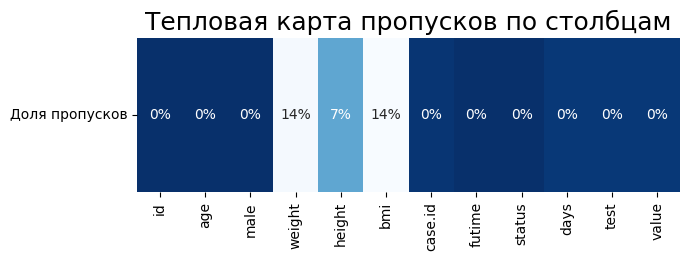

In [34]:
mask = nafld.isna()

prop_missings = mask.sum()/mask.count()

# Преобразуем в DataFrame для построения тепловой карты
df_prop_missings = pd.DataFrame(prop_missings.values.reshape(1, -1),
                                columns=prop_missings.index,
                                index=['Доля пропусков'])

# Тепловая карта пропусков
plt.figure(figsize=(7, 2))
sns.heatmap(df_prop_missings, annot=True, fmt='.0%', cmap='Blues_r', cbar=False)
plt.title("Тепловая карта пропусков по столбцам", fontsize=18)
plt.yticks(rotation=0)
plt.show()

Пропуски не будем ни удалять , ни заполнять чтобы не исказить изначальные данные.

**Выводы по первичному анализу датафрейма:**

1. Изучили данные на предмет аномальных значений. Аномалий не было обнаружено, далее изучим данные на выбросы.

2. Изучили данные на пропуски. Т к нет строк с пропусками более половины, было принято решение оставить пропуски, чтобы не искажать данные.

Значения столбцов:

age — возраст при поступлении на обследование;

male — пол (0 — женский, 1 — мужской);

weight — вес в кг;

height — рост в см;

bmi — индекс массы тела;

case.id — идентификатор случая НАЖБП, который
соответствует этот объект;

futime — прошедшее время до последнего наблюдения или смерти, в днях;

status — статус пациента (1 — умерший, 0 — живой на момент последнего визита);

days — дни с даты индексирования;

test — тип записанного значения;

value — числовое значение.

In [35]:
anomaly(nwtco)

Размер файла:(4028, 9)
----------------------------------------------------------------------------------------------------
Уникальные значения показателя: seqno
[   1    2    3 ... 4086 4087 4088]
Количество уникальных значений: 4028
Количество всех значений: 4028
Количество пропусков в столбце seqno: 0
----------------------------------------------------------------------------------------------------
Уникальные значения показателя: instit
[2 1]
Количество уникальных значений: 2
Количество всех значений: 4028
Количество пропусков в столбце instit: 0
----------------------------------------------------------------------------------------------------
Уникальные значения показателя: histol
[2 1]
Количество уникальных значений: 2
Количество всех значений: 4028
Количество пропусков в столбце histol: 0
----------------------------------------------------------------------------------------------------
Уникальные значения показателя: stage
[1 2 4 3]
Количество уникальных значений: 4
Количес

In [36]:
nwtco.duplicated().sum()

0

In [37]:
nan_counts(nwtco)


Общее количество строк с более чем половиной NaN: 0


Провели предобработку данных двух датафреймов. Т к последний датафрейм добавлен в базу ошибочно, то мы не имеем описание столбцов. В свяхи с этим проведем поверхностых исследовательский анализ.

**Выводы по первичному анализу датафрейма:**

1. Изучили данные на предмет аномальных значений. Аномалий не было обнаружено, далее изучим данные на выбросы.

2. Изучили данные на пропуски. Т к нет строк с пропусками более половины, было принято решение оставить пропуски, чтобы не искажать данные.

##Исследовательский анализ датафреймов

Проведем сначала анализ последнего датафрейма.

In [38]:
nwtco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4028 entries, 0 to 4027
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   seqno         4028 non-null   int64
 1   instit        4028 non-null   int64
 2   histol        4028 non-null   int64
 3   stage         4028 non-null   int64
 4   study         4028 non-null   int64
 5   rel           4028 non-null   int64
 6   edrel         4028 non-null   int64
 7   age           4028 non-null   int64
 8   in.subcohort  4028 non-null   bool 
dtypes: bool(1), int64(8)
memory usage: 255.8 KB


In [39]:
nwtco.columns

Index(['seqno', 'instit', 'histol', 'stage', 'study', 'rel', 'edrel', 'age',
       'in.subcohort'],
      dtype='object')

In [40]:
int_column=['seqno', 'instit', 'histol', 'stage',
            'study', 'rel', 'edrel', 'age']
b_column=['in.subcohort']

Исследовательский анализ показателя seqno


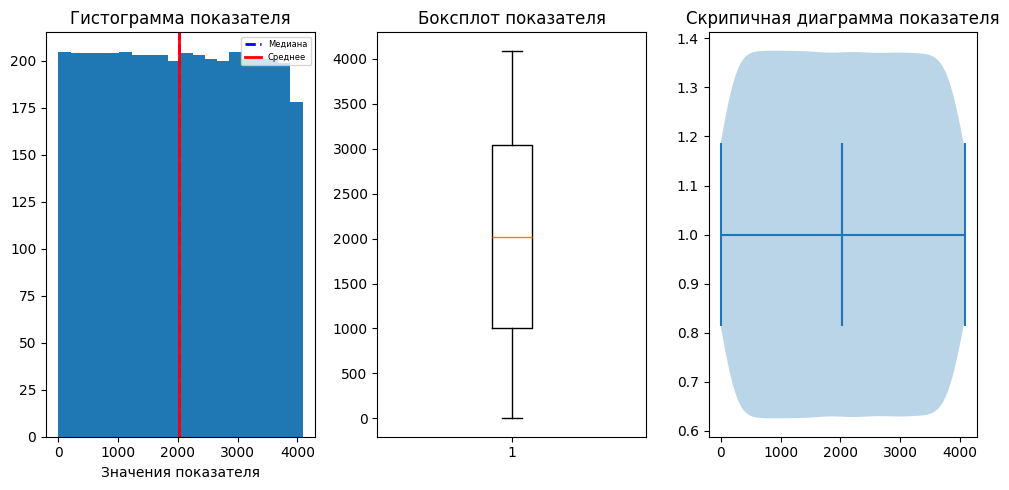

Показатели описательной статистики
count    4028.000000
mean     2025.548411
std      1173.900596
min         1.000000
25%      1008.750000
50%      2022.500000
75%      3039.250000
max      4088.000000
Name: seqno, dtype: float64
----------------------------------------------------------------------------------------------------
Исследовательский анализ показателя instit


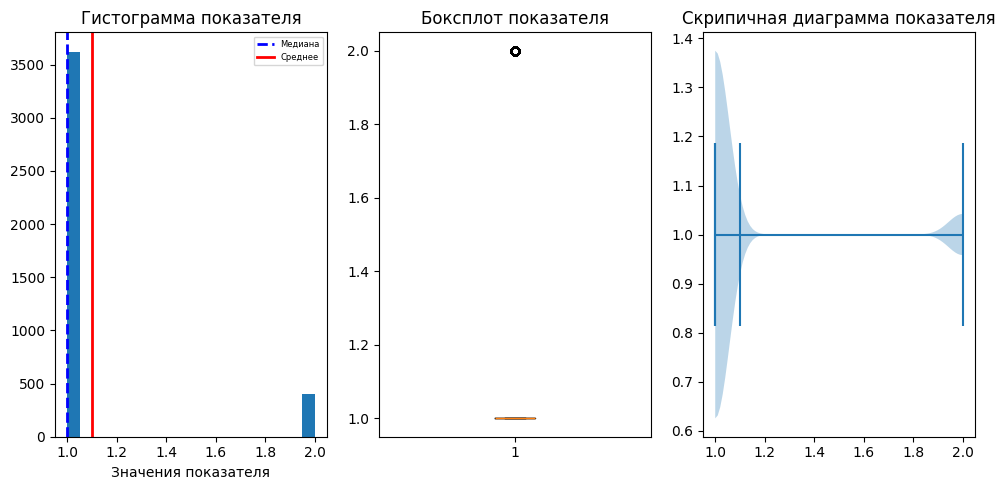

Показатели описательной статистики
count    4028.000000
mean        1.100794
std         0.301094
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: instit, dtype: float64
----------------------------------------------------------------------------------------------------
Исследовательский анализ показателя histol


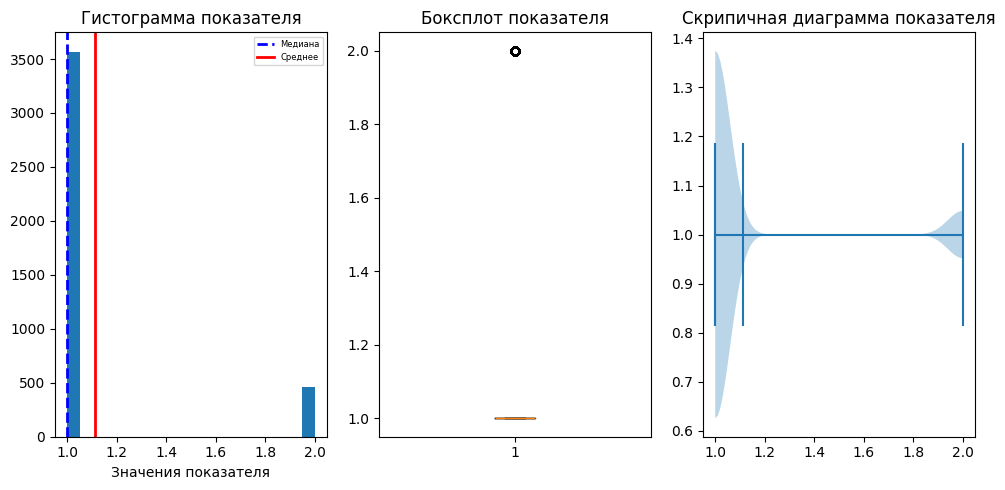

Показатели описательной статистики
count    4028.000000
mean        1.113952
std         0.317793
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: histol, dtype: float64
----------------------------------------------------------------------------------------------------
Исследовательский анализ показателя stage


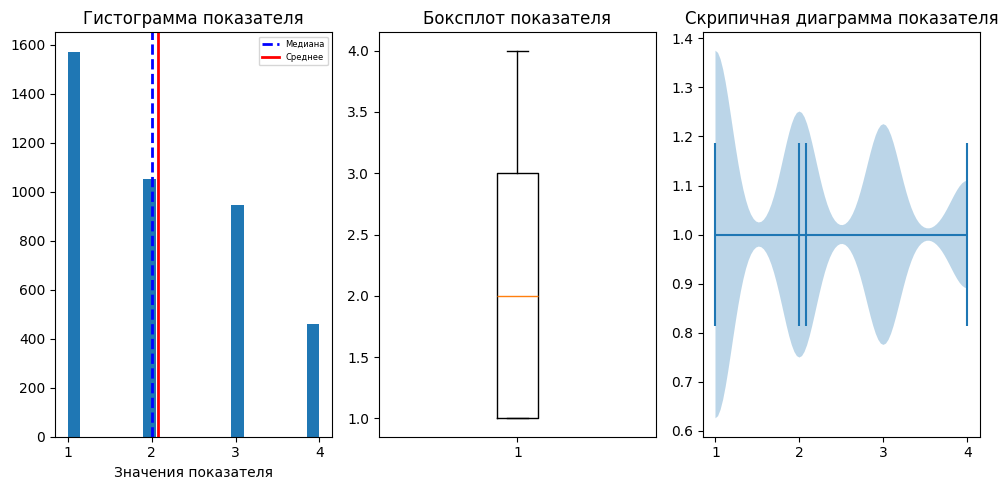

Показатели описательной статистики
count    4028.000000
mean        2.072493
std         1.037517
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: stage, dtype: float64
----------------------------------------------------------------------------------------------------
Исследовательский анализ показателя study


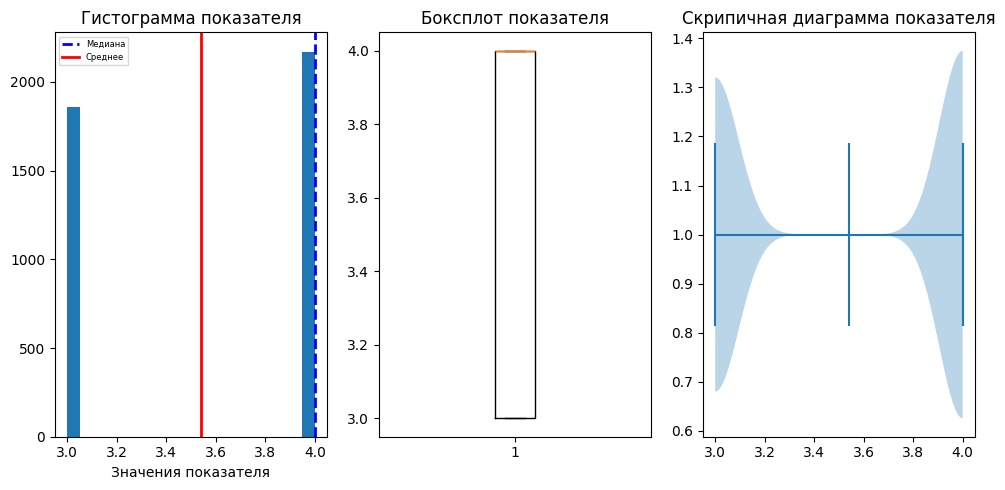

Показатели описательной статистики
count    4028.000000
mean        3.538977
std         0.498540
min         3.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: study, dtype: float64
----------------------------------------------------------------------------------------------------
Исследовательский анализ показателя rel


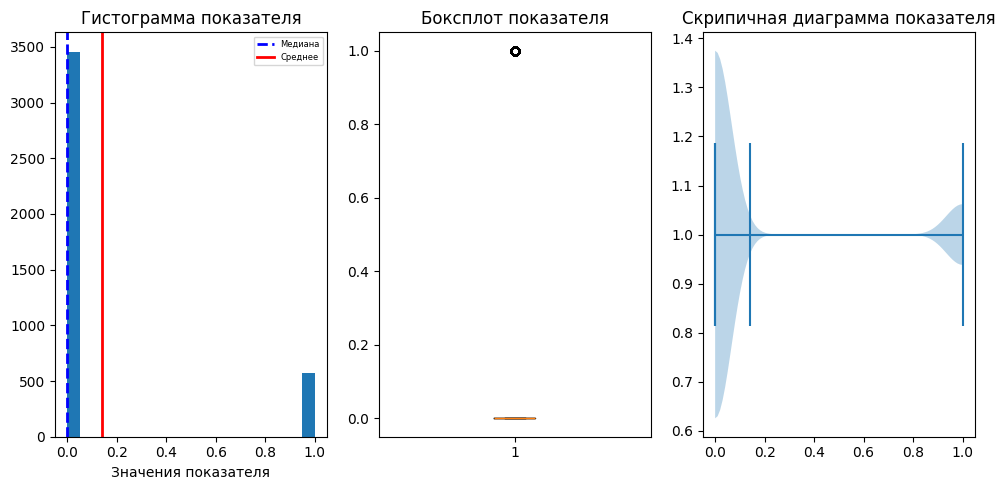

Показатели описательной статистики
count    4028.000000
mean        0.141758
std         0.348845
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: rel, dtype: float64
----------------------------------------------------------------------------------------------------
Исследовательский анализ показателя edrel


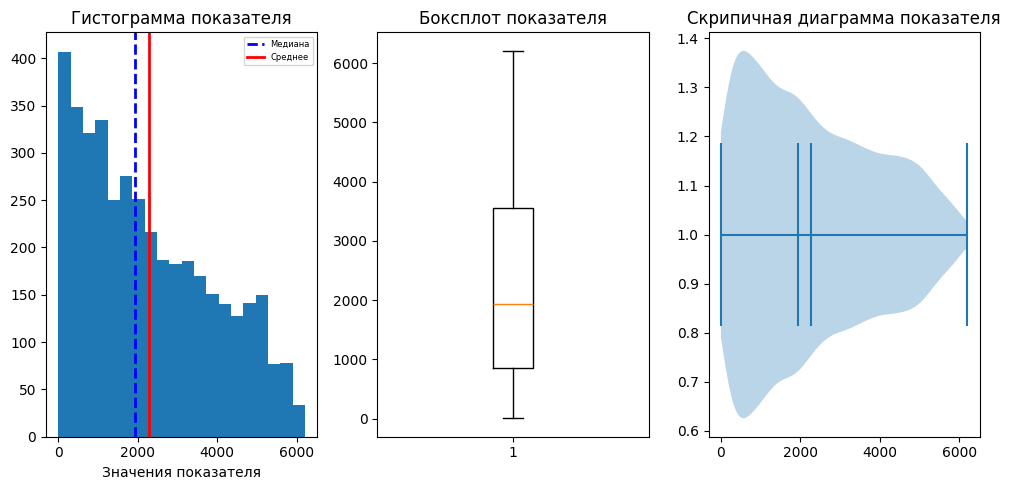

Показатели описательной статистики
count    4028.000000
mean     2276.680238
std      1640.179134
min         4.000000
25%       856.750000
50%      1939.000000
75%      3561.000000
max      6209.000000
Name: edrel, dtype: float64
----------------------------------------------------------------------------------------------------
Исследовательский анализ показателя age


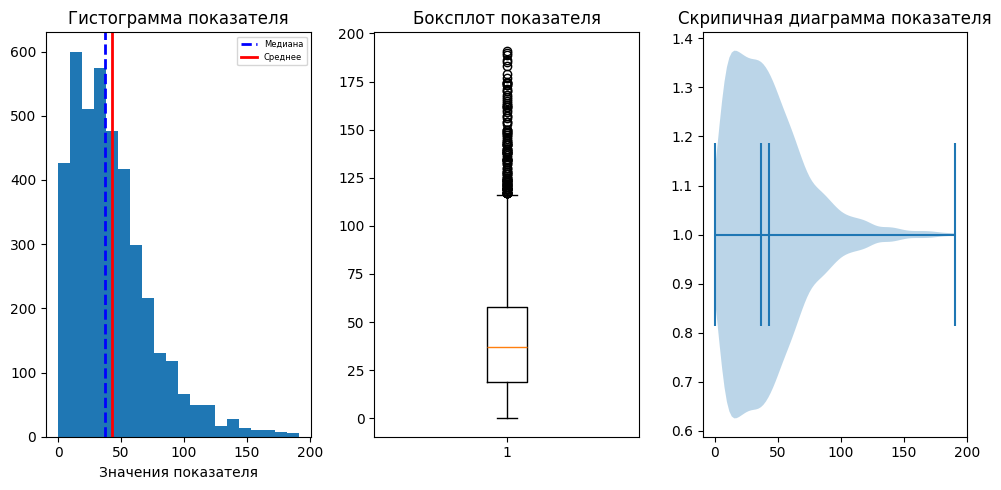

Показатели описательной статистики
count    4028.000000
mean       42.640020
std        31.177974
min         0.000000
25%        19.000000
50%        37.000000
75%        58.000000
max       191.000000
Name: age, dtype: float64
----------------------------------------------------------------------------------------------------


In [41]:
for col in int_column:
    print(f'Исследовательский анализ показателя {col}')
    analisys_num(nwtco[col])
    print('-'*100)

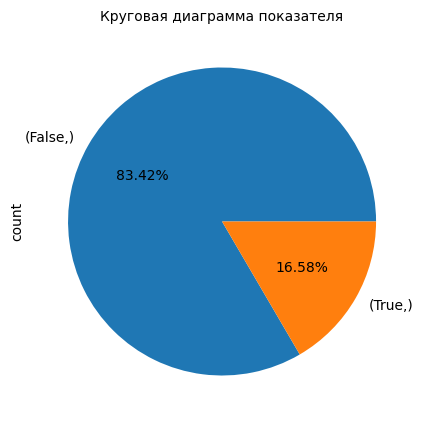

In [42]:
analisys_cat_pie(nwtco[b_column])

Как видно из графиков, есть часть данных, которая делится на группы: instit, histol, stage. Остальные количественные показатели распределены с сдвигом влево. Показатель in.subcohort на 83 % имеет значение False.


In [43]:
nafld.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398189 entries, 0 to 402005
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       398189 non-null  int64  
 1   age      398189 non-null  int64  
 2   male     398189 non-null  int64  
 3   weight   342140 non-null  float64
 4   height   371720 non-null  float64
 5   bmi      341038 non-null  float64
 6   case.id  396956 non-null  float64
 7   futime   398189 non-null  int64  
 8   status   398189 non-null  int64  
 9   days     396306 non-null  float64
 10  test     396306 non-null  object 
 11  value    396306 non-null  float64
dtypes: float64(6), int64(5), object(1)
memory usage: 39.5+ MB


In [44]:
nafld.columns

Index(['id', 'age', 'male', 'weight', 'height', 'bmi', 'case.id', 'futime',
       'status', 'days', 'test', 'value'],
      dtype='object')

In [45]:
num_columns = ['age', 'weight', 'height', 'bmi',
               'futime', 'days', 'value']

cat_columns=['test']

pie_columns=['male', 'status']

Исследовательский анализ показателя age


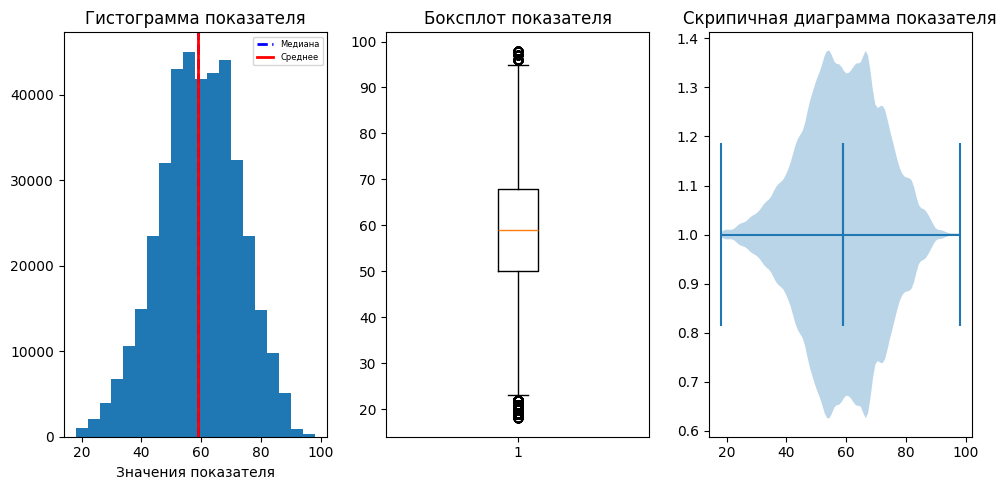

Показатели описательной статистики
count    398189.000000
mean         58.835681
std          13.277946
min          18.000000
25%          50.000000
50%          59.000000
75%          68.000000
max          98.000000
Name: age, dtype: float64
----------------------------------------------------------------------------------------------------
Исследовательский анализ показателя weight


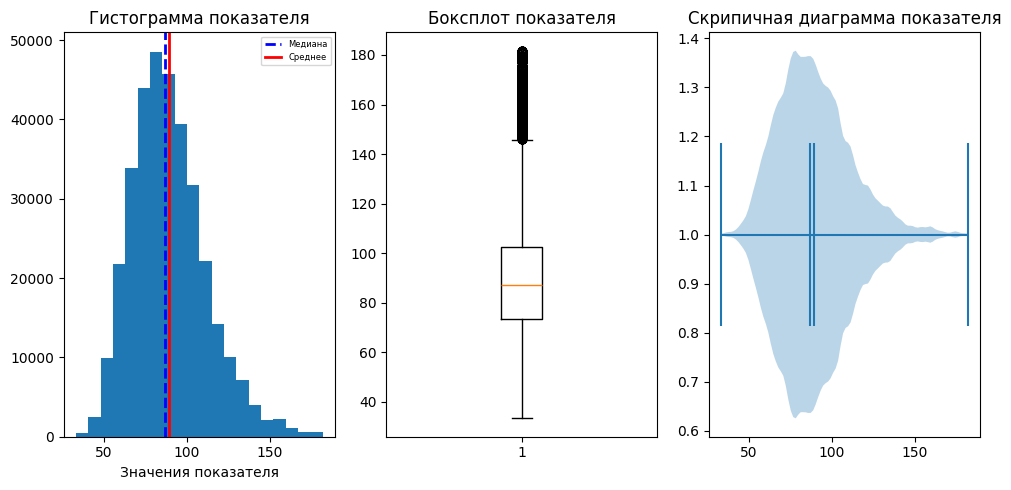

Показатели описательной статистики
count    342140.000000
mean         89.364547
std          22.316480
min          33.400000
25%          73.600000
50%          87.000000
75%         102.500000
max         181.700000
Name: weight, dtype: float64
----------------------------------------------------------------------------------------------------
Исследовательский анализ показателя height


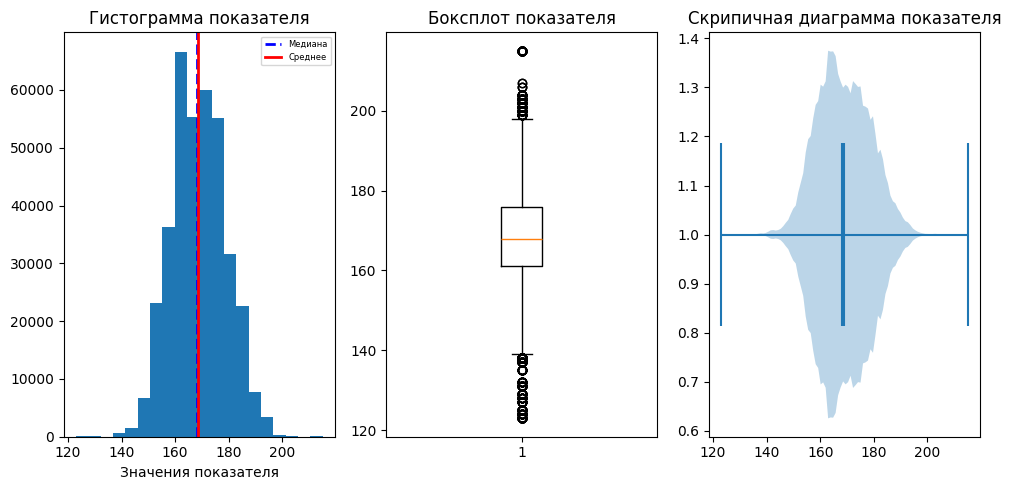

Показатели описательной статистики
count    371720.000000
mean        168.697875
std          10.051632
min         123.000000
25%         161.000000
50%         168.000000
75%         176.000000
max         215.000000
Name: height, dtype: float64
----------------------------------------------------------------------------------------------------
Исследовательский анализ показателя bmi


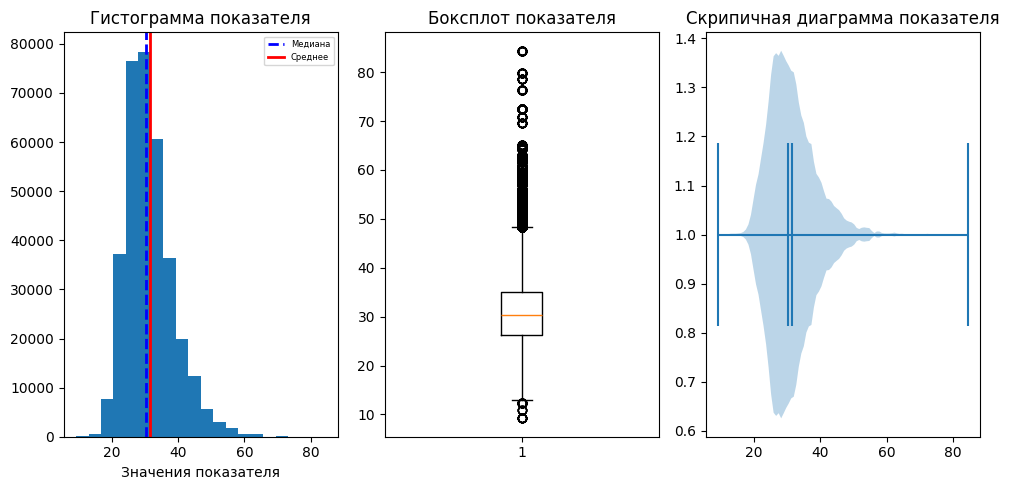

Показатели описательной статистики
count    341038.000000
mean         31.366949
std           7.199319
min           9.207332
25%          26.288468
50%          30.246016
75%          35.132522
max          84.395725
Name: bmi, dtype: float64
----------------------------------------------------------------------------------------------------
Исследовательский анализ показателя futime


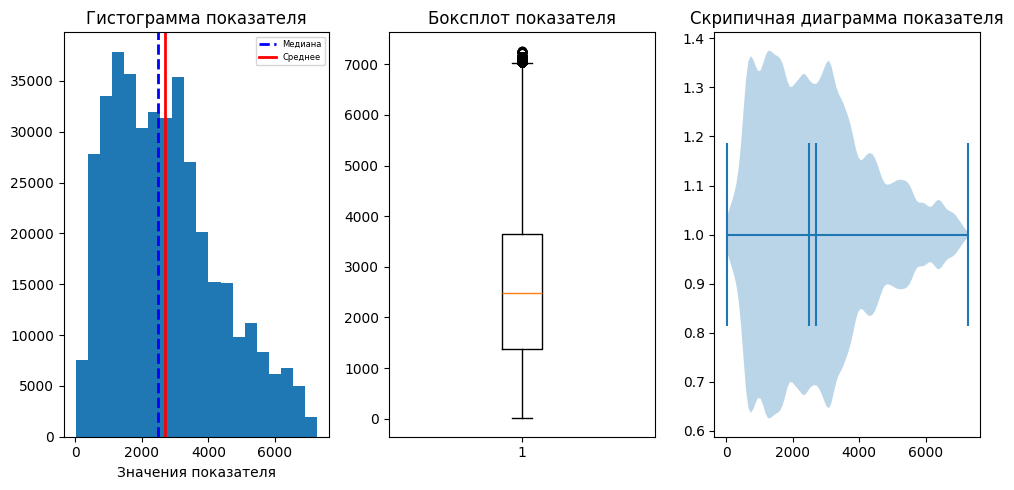

Показатели описательной статистики
count    398189.000000
mean       2686.459920
std        1595.906019
min           7.000000
25%        1384.000000
50%        2483.000000
75%        3643.000000
max        7268.000000
Name: futime, dtype: float64
----------------------------------------------------------------------------------------------------
Исследовательский анализ показателя days


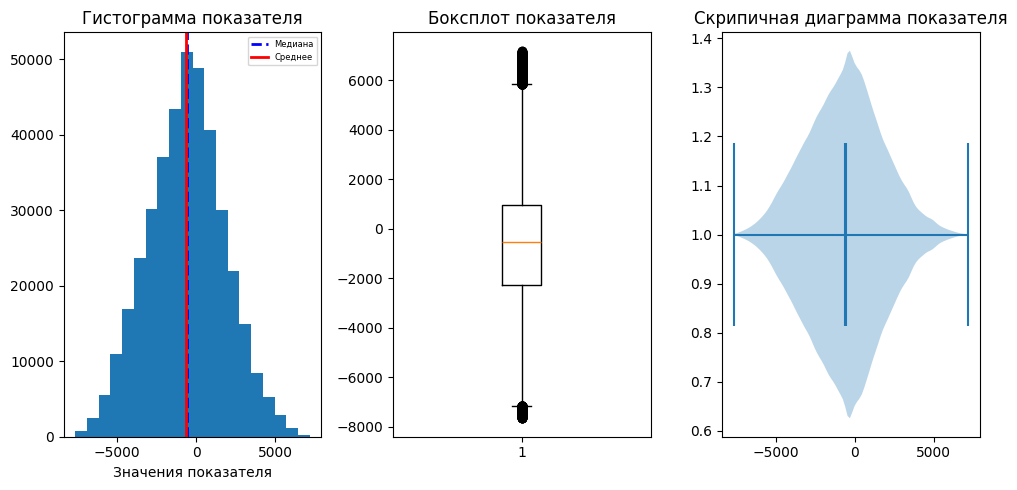

Показатели описательной статистики
count    396306.000000
mean       -624.987278
std        2412.044895
min       -7651.000000
25%       -2276.000000
50%        -550.000000
75%         965.000000
max        7187.000000
Name: days, dtype: float64
----------------------------------------------------------------------------------------------------
Исследовательский анализ показателя value


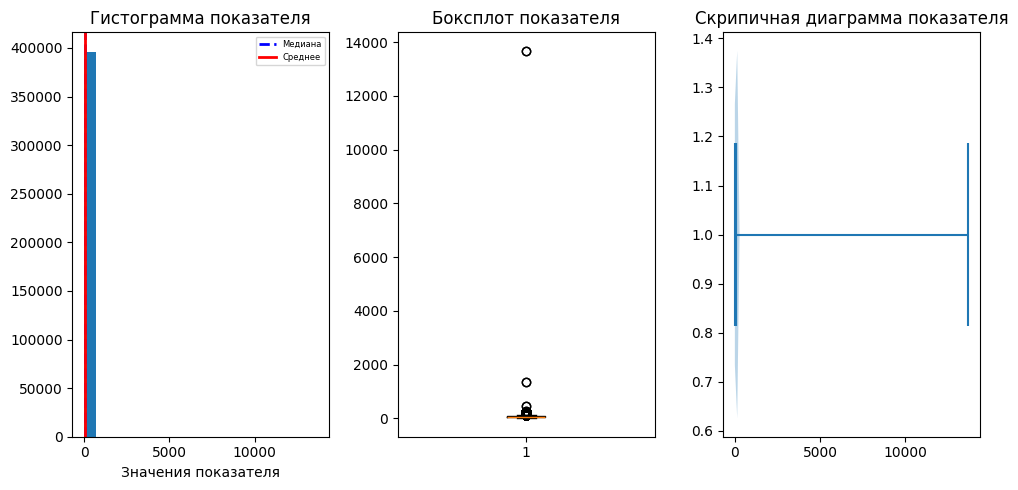

Показатели описательной статистики
count    396306.000000
mean         63.798823
std          48.574394
min           0.000000
25%          40.000000
50%          51.000000
75%          71.000000
max       13682.000000
Name: value, dtype: float64
----------------------------------------------------------------------------------------------------


In [46]:
for col in num_columns:
    print(f'Исследовательский анализ показателя {col}')
    analisys_num(nafld[col])
    print('-'*100)

In [47]:
nafld = nafld.query('value < 400')

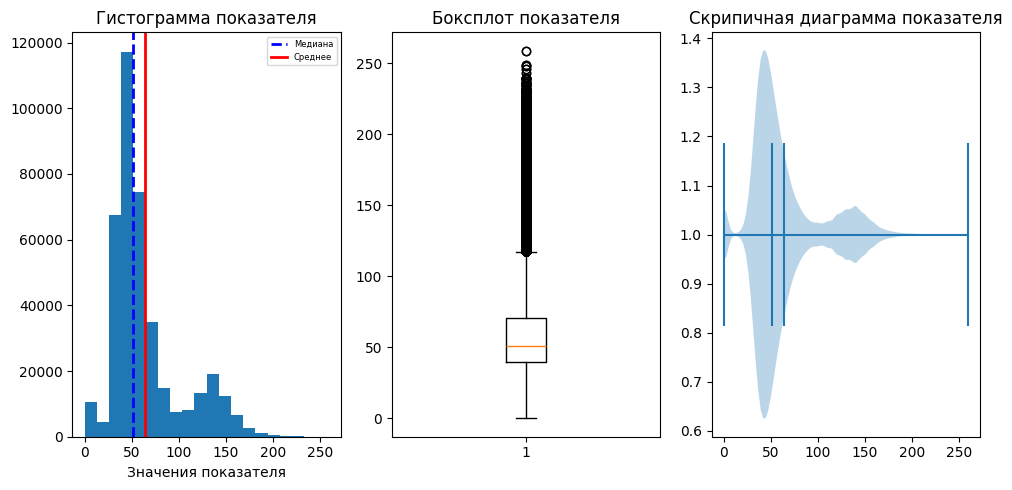

Показатели описательной статистики
count    396300.000000
mean         63.721631
std          37.610041
min           0.000000
25%          40.000000
50%          51.000000
75%          71.000000
max         259.000000
Name: value, dtype: float64


In [48]:
analisys_num(nafld['value'])

Интересное наблюдение: в показателе days половина значений отрицательная. Согласно описанию показателя, days это дни с даты индексирования. Отрицательные значения выглядят как намеренно внесенные данные, а не ошибка ввода. Предположительно в данной записи есть смысл, который не раскрыт в описании датасета.

Исследовательский анализ показателя test


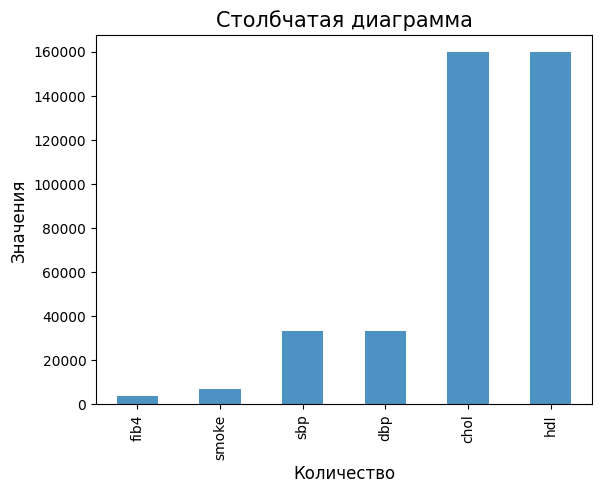

----------------------------------------------------------------------------------------------------


In [49]:
for col in cat_columns:
    print(f'Исследовательский анализ показателя {col}')
    analisys_cat_plot(nafld[col])
    print('-'*100)

Исследовательский анализ показателя male


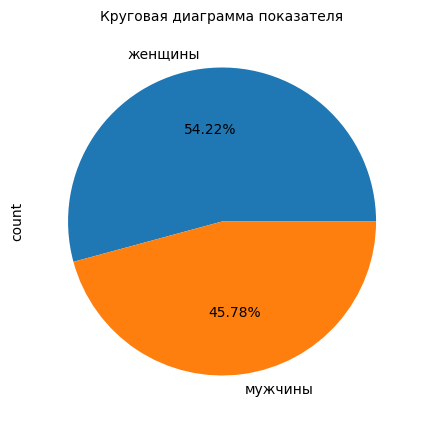

----------------------------------------------------------------------------------------------------
Исследовательский анализ показателя status


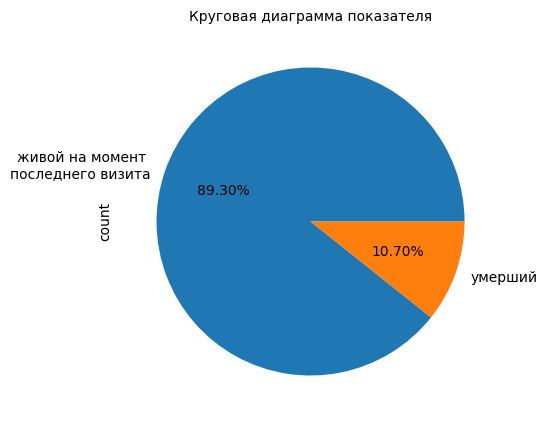

----------------------------------------------------------------------------------------------------


In [50]:
column_labels = {
    'male': {0: 'женщины', 1: 'мужчины'},
    'status': {0: 'живой на момент \nпоследнего визита', 1: 'умерший'}}

for col in pie_columns:
    print(f'Исследовательский анализ показателя {col}')
    analisys_cat_pie(nafld[col], column_labels.get(col))
    print('-'*100)

Удалили выброс в столбце рост. Для дальнейшего анализа категоризируем такие данные, как bmi и возраст. Также удалим id и case.id, т к для дальнейшего анализа они не несут смысловой нагрузки.

**Выводы:**

1. В датафрейме 89 % пациентов живы

2. 54 % пациентов женщины, 45 % мужчины.

3. Средний возраст составляет 58 лет, вес - 89 кг, рост - 168 см, значение индекса массы тела - 31.

4. Самый частый тест для постановки диагноза: измерение уровня транспортного холестерина и общего холестерина.

In [51]:
age(nafld)

In [52]:
bmi(nafld)

In [53]:
nafld = nafld.drop(['id', 'case.id'], axis = 1)

In [54]:
nafld.info()

<class 'pandas.core.frame.DataFrame'>
Index: 396300 entries, 0 to 402005
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   age           396300 non-null  int64  
 1   male          396300 non-null  int64  
 2   weight        341742 non-null  float64
 3   height        371218 non-null  float64
 4   bmi           340688 non-null  float64
 5   futime        396300 non-null  int64  
 6   status        396300 non-null  int64  
 7   days          396300 non-null  float64
 8   test          396300 non-null  object 
 9   value         396300 non-null  float64
 10  age_category  396300 non-null  int64  
 11  bmi_category  396300 non-null  int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 47.4+ MB


Согласно информации о датасетах, мы имеем информацию о уже заболевших людях. То есть все взаимосвязи можно посмотреть только внутри заболевшей группы.

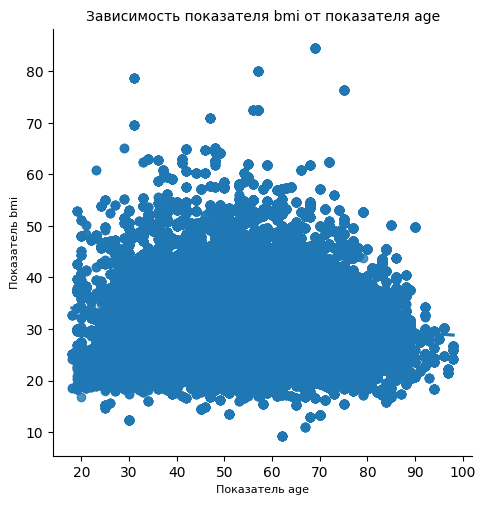

In [55]:
grafic(nafld, 'age', 'bmi')

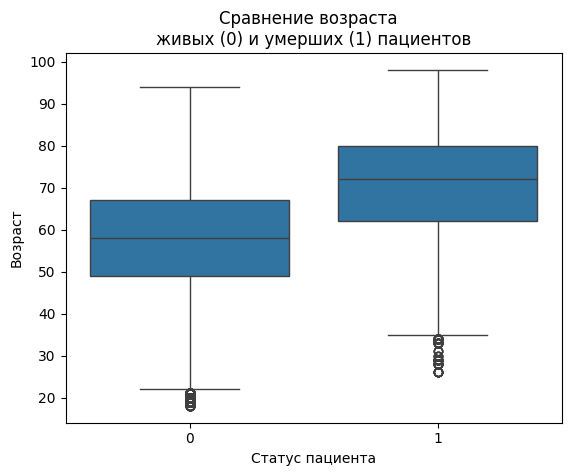

In [56]:
#изучим взамoсвязь умерших пациентов и категории возраста
sns.boxplot(x='status', y='age', data=nafld)
plt.title('Сравнение возраста  \nживых (0) и умерших (1) пациентов')
plt.xlabel('Статус пациента')
plt.ylabel('Возраст')
plt.show()

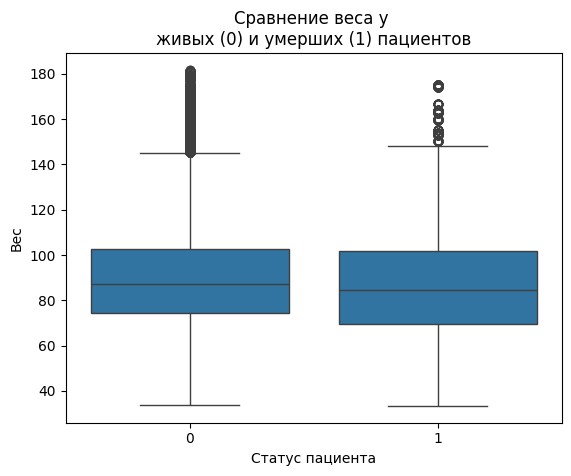

In [57]:
#сравним, какой был вес у умерших пациентов и живых
sns.boxplot(x='status', y='weight', data=nafld)
plt.title('Сравнение веса у \nживых (0) и умерших (1) пациентов')
plt.xlabel('Статус пациента')
plt.ylabel('Вес')
plt.show()

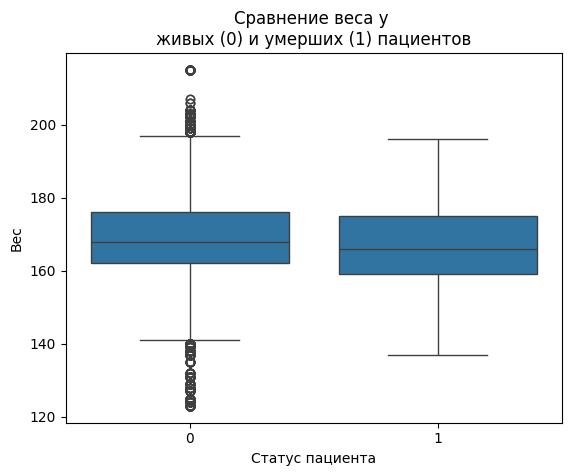

In [58]:
#сравним, какой был рост у умерших пациентов и живых
sns.boxplot(x='status', y='height', data=nafld)
plt.title('Сравнение веса у \nживых (0) и умерших (1) пациентов')
plt.xlabel('Статус пациента')
plt.ylabel('Вес')
plt.show()

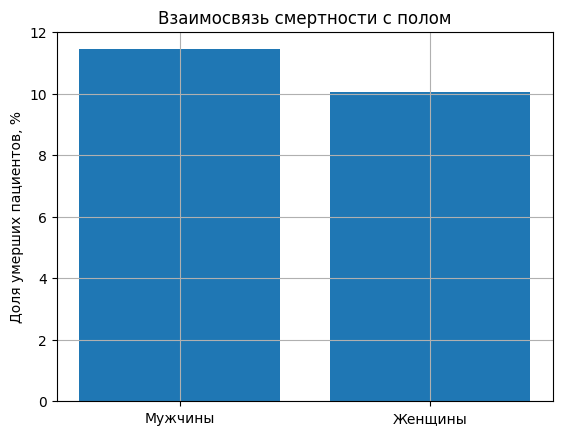

In [59]:
#сравним смертность в группах по полу
total_males = len(nafld.query('male == 1'))
total_females = len(nafld.query('male == 0'))

male_die = len(nafld.query('male == 1 & status == 1'))
female_die = len(nafld.query('male == 0 & status == 1'))

male_die_rate = male_die / total_males * 100
female_die_rate = female_die / total_females * 100

#настроим диаграмму
labels = ['Мужчины', 'Женщины']
values = [male_die_rate, female_die_rate]

x_pos = [0, 1]

fig, ax = plt.subplots()
ax.bar(x_pos, values, align='center')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_ylabel('Доля умерших пациентов, %')
ax.set_title('Взаимосвязь смертности с полом')
plt.grid(True)
plt.show()

In [60]:
nafld['test'].unique()

array(['hdl', 'chol', 'sbp', 'dbp', 'fib4', 'smoke'], dtype=object)

In [61]:
# обновим значения в колонке 'test'
for index, value in nafld['test'].items():
    if value != 'hdl' and value != 'chol':
        nafld.at[index, 'test'] = 'other'

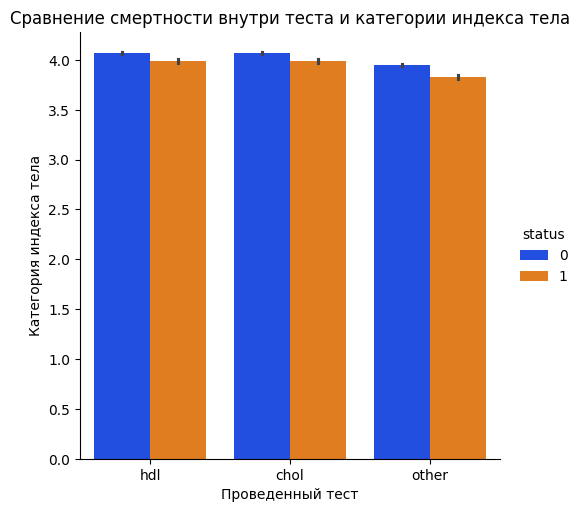

In [62]:
#разделим датафреймы по тестам и сравним смертность внутри теста
sns.catplot(x='test',  y='bmi_category', data = nafld,
            palette='bright', kind='bar',hue='status')
plt.title('Сравнение смертности внутри теста и категории индекса тела')
plt.xlabel('Проведенный тест')
plt.ylabel('Категория индекса тела')
plt.show()

interval columns not set, guessing: ['age', 'male', 'weight', 'height', 'bmi', 'futime', 'status', 'days', 'value', 'age_category', 'bmi_category']


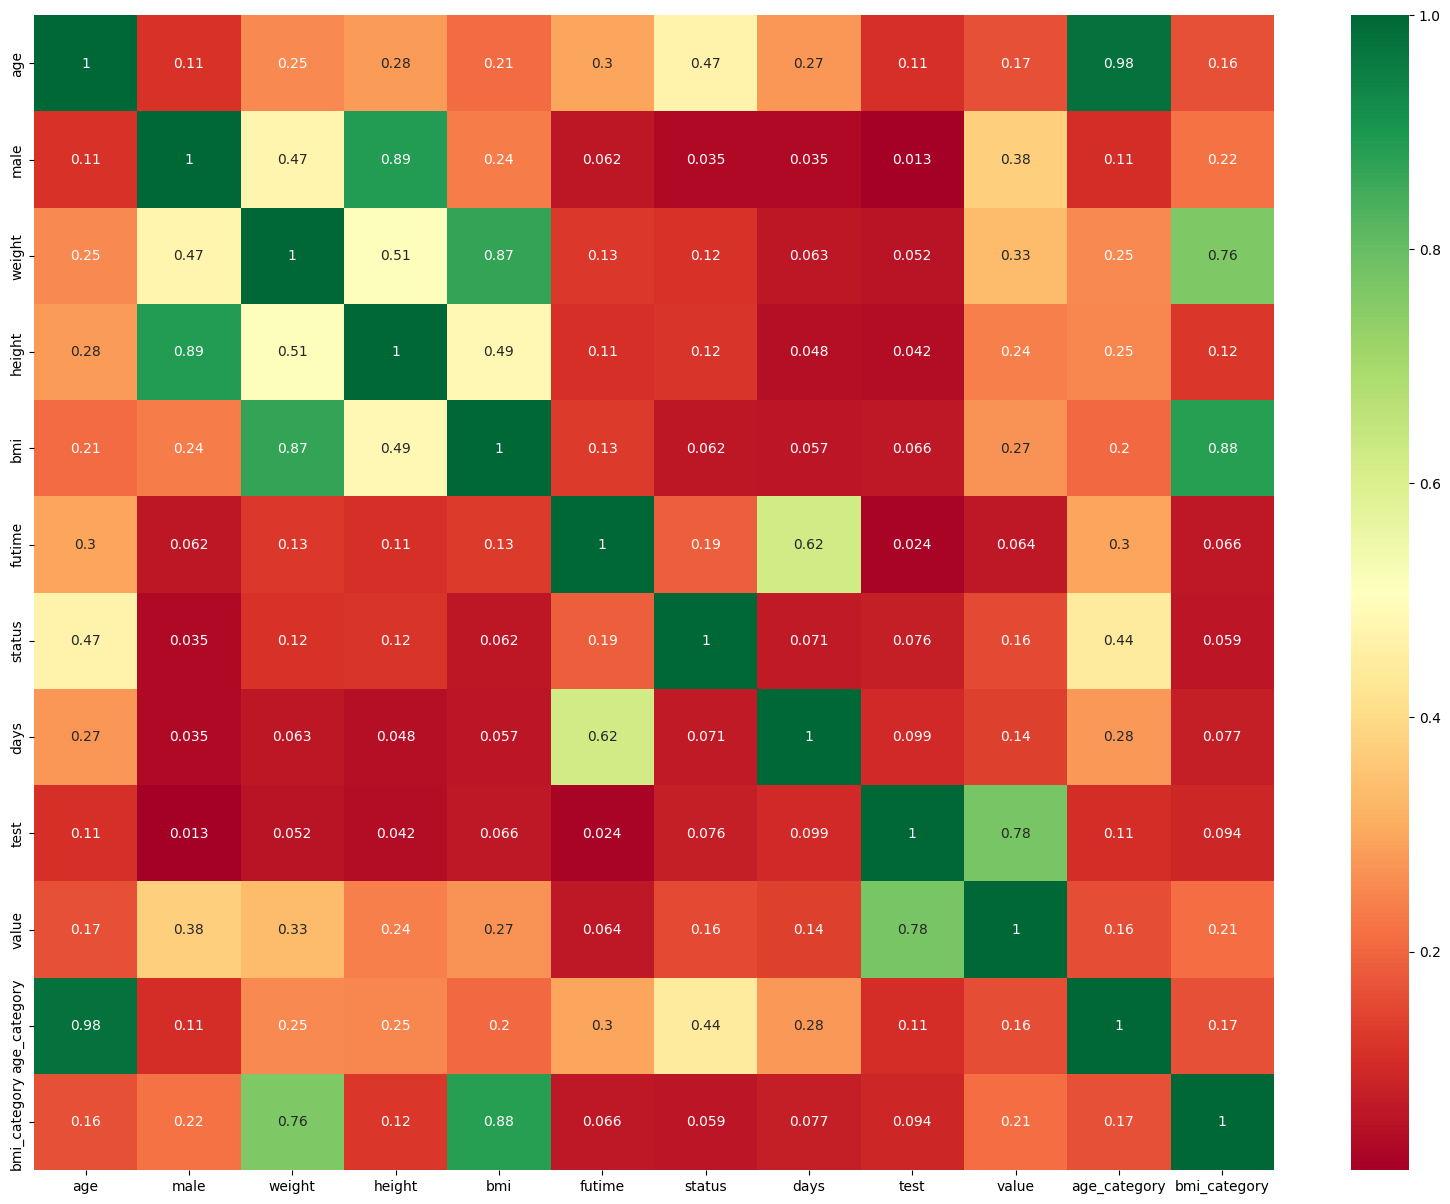

CPU times: user 6.23 s, sys: 365 ms, total: 6.6 s
Wall time: 14.3 s


In [63]:
%%time
corr_matrix_df = nafld.phik_matrix()
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corr_matrix_df, annot=True, cmap='RdYlGn')
plt.show()

В связи с ошибкой при передачи данных, не была получена информация по контрольной группе, что ограничило возможности для полного анализа и полных выводов.

**Выводы:**

1. Как видно из всего исследования, в сильнее всего статус пациента зависит от возраста. В дальнейшем интересно было бы рассмотереть взаимосвязи в сравнении с контрольной группой.

2. Статус пациента не зависит от индекса массы тела и предсказать смертность с помощью какого-либо конкретного анализа не представляется возможным. Внутри теста смертность значимо не отличается.

3. Рекомендовано предоставить данные для контрольной группы для дальнейшего анализа зависимостей, так же необходима расшифровка кодировки дней. Возможно это может открыть новые зависимости.

В связи с отсутвием контрольной группы невозможно сделать окончательные выводы по зависимости показателей от смертности. На данный момент выделить конкретный фактор, по которому можно прогнозировать исход.